Загрузка и предварительная обработка данных

Загрузка данных

In [5]:
import pandas as pd

# Загрузка данных из файла
file_path = "D:/Центральный университет/data.csv"
data = pd.read_csv(file_path)

data.head()



,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


Предварительная обработка данных
Очистка данных: Обработка пропущенных значений и устранение выбросов.
Преобразование категориальных данных в числовые: Используем one-hot encoding для категориальных переменных.

In [6]:
# Проверка на наличие пропущенных значений
missing_values = data.isnull().sum()
missing_values


Price               0
Apartment type      0
Metro station       0
Minutes to metro    0
Region              0
Number of rooms     0
Area                0
Living area         0
Kitchen area        0
Floor               0
Number of floors    0
Renovation          0
dtype: int64

Очистка данных и преобразование категориальных переменных

In [7]:
# Заполнение пропущенных значений или удаление строк с пропусками
data = data.dropna()  

# Преобразование категориальных данных в числовые
data = pd.get_dummies(data)

data.head()


,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Apartment type_New building,Apartment type_Secondary,...,Metro station_Юго-Западная,Metro station_Южная,Metro station_Ясенево,Metro station_Яхромская,Region_Moscow,Region_Moscow region,Renovation_Cosmetic,Renovation_Designer,Renovation_European-style renovation,Renovation_Without renovation
0,6300000.0,6.0,1.0,30.6,11.1,8.5,25.0,25,False,True,...,False,False,False,False,False,True,True,False,False,False
1,9000000.0,2.0,1.0,49.2,20.0,10.0,6.0,15,False,True,...,False,False,False,False,False,True,False,False,True,False
2,11090000.0,14.0,1.0,44.7,16.2,13.1,10.0,25,False,True,...,False,False,False,False,False,True,True,False,False,False
3,8300000.0,8.0,1.0,35.1,16.0,11.0,12.0,33,False,True,...,False,False,False,False,False,True,False,False,True,False
4,6450000.0,6.0,1.0,37.7,15.2,4.0,5.0,5,False,True,...,False,False,False,False,False,True,False,False,False,True


In [8]:
# Преобразование категориальных данных в числовые
data = pd.get_dummies(data, columns=['Apartment type', 'Metro station', 'Region', 'Renovation'])

data.head()


KeyError: "None of [Index(['Apartment type', 'Metro station', 'Region', 'Renovation'], dtype='object')] are in the [columns]"

Исследовательский анализ данных (EDA)

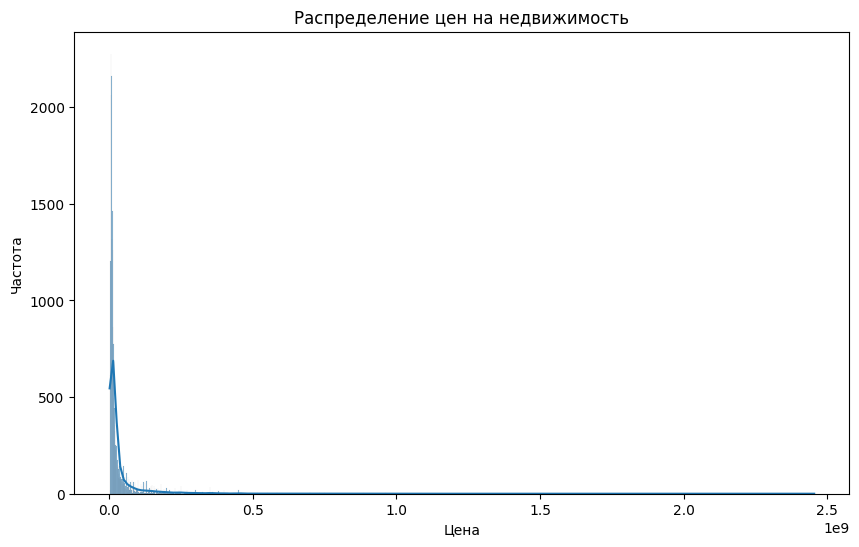

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация распределения цен
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Распределение цен на недвижимость')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()


Исследование корреляций между характеристиками и ценой

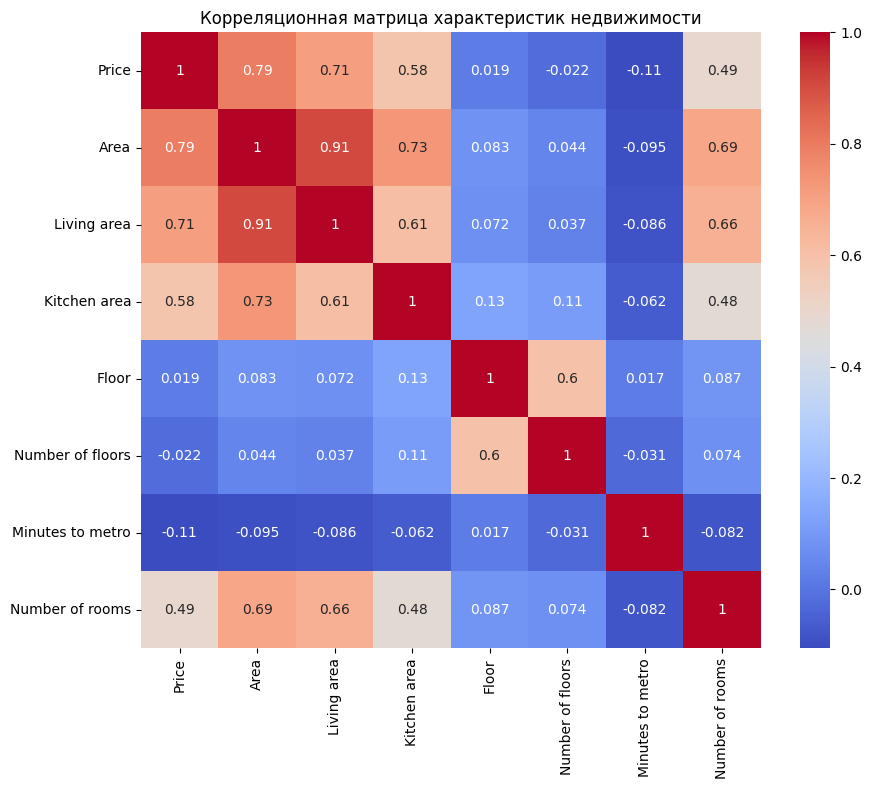

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ограничение на число переменных для корреляционной матрицы
selected_columns = ['Price', 'Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors', 'Minutes to metro', 'Number of rooms']

# Корреляционная матрица
corr_matrix = data[selected_columns].corr()

# Тепловая карта корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица характеристик недвижимости')
plt.show()


Выявление ключевых факторов, влияющих на цену недвижимости

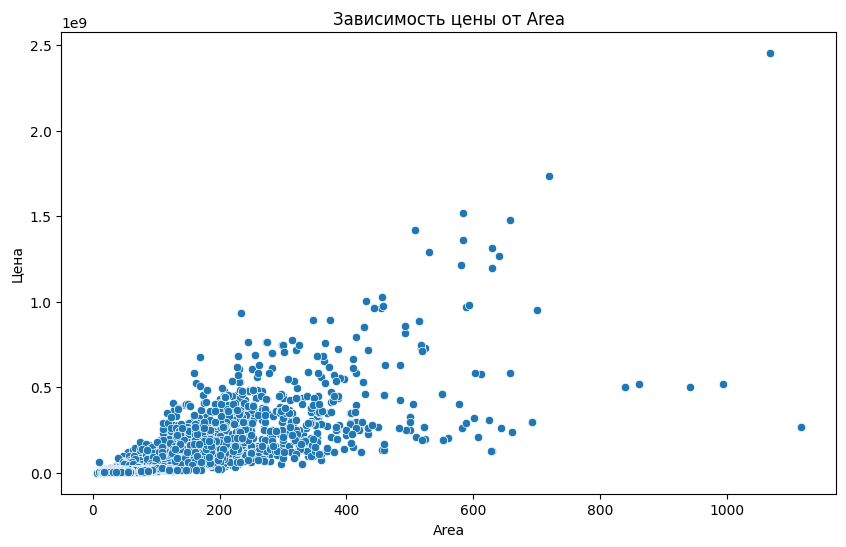

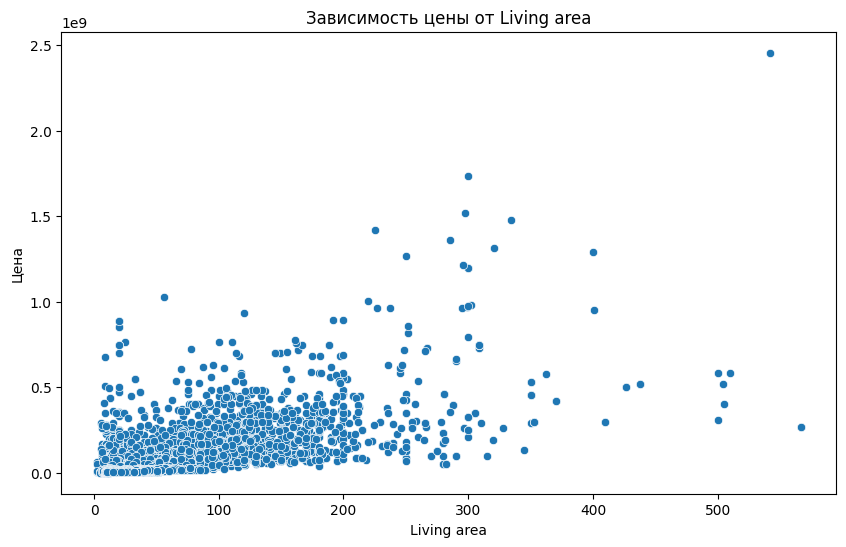

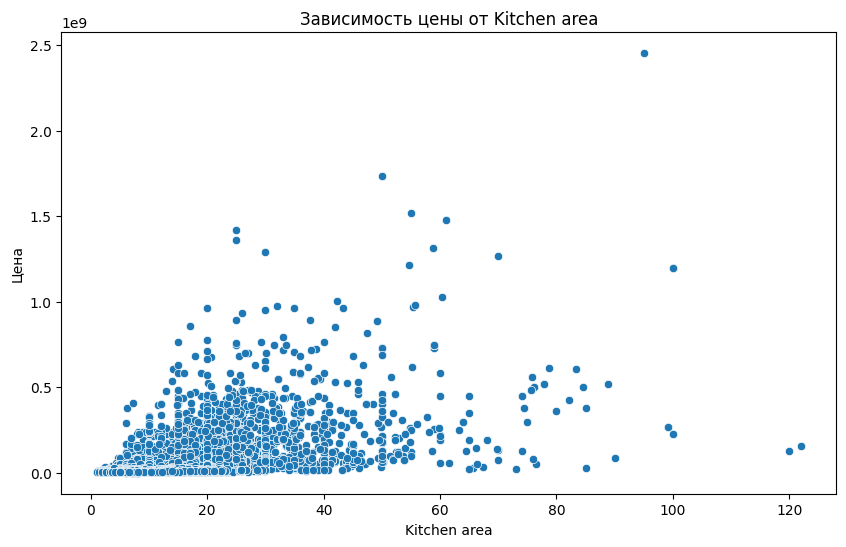

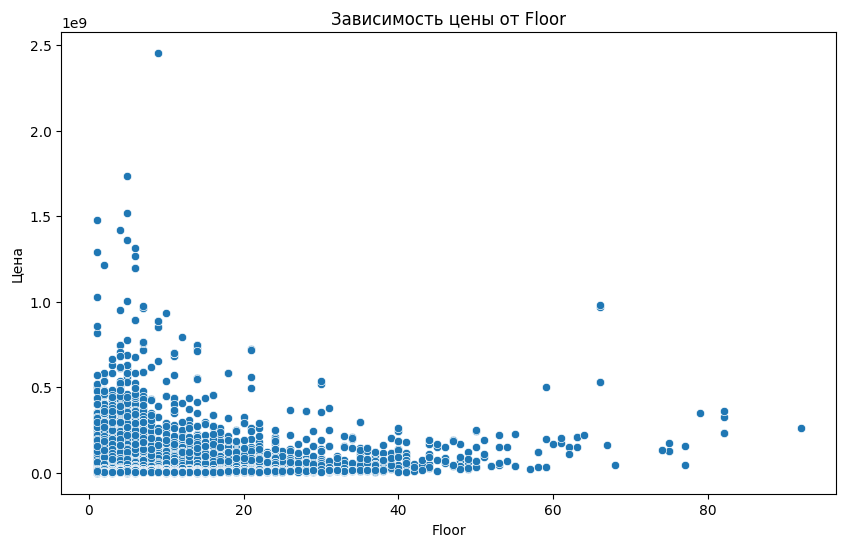

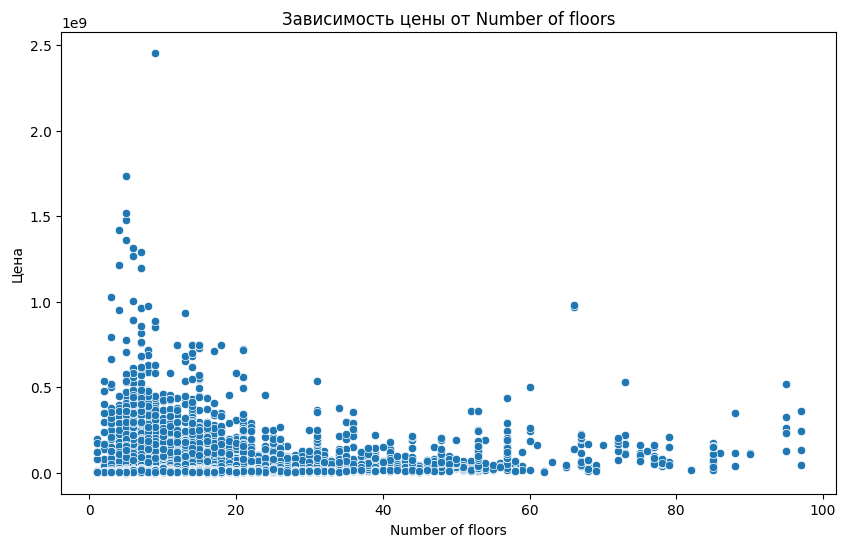

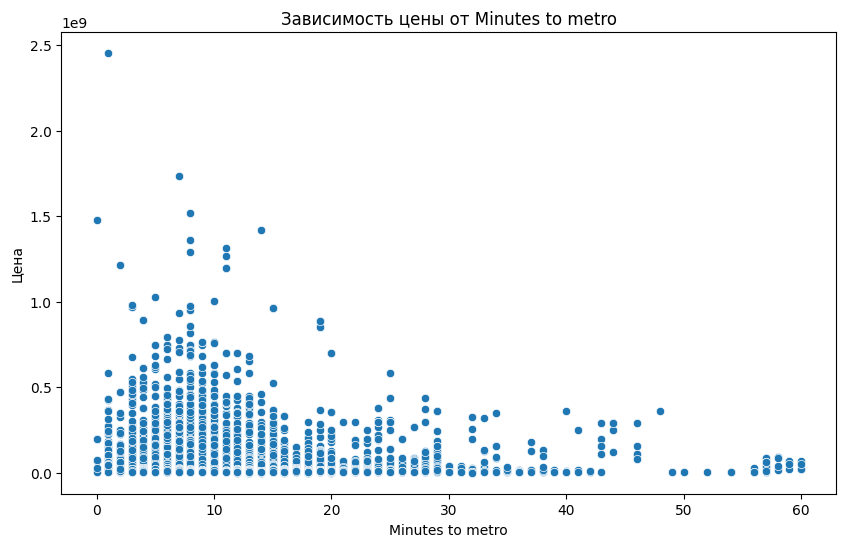

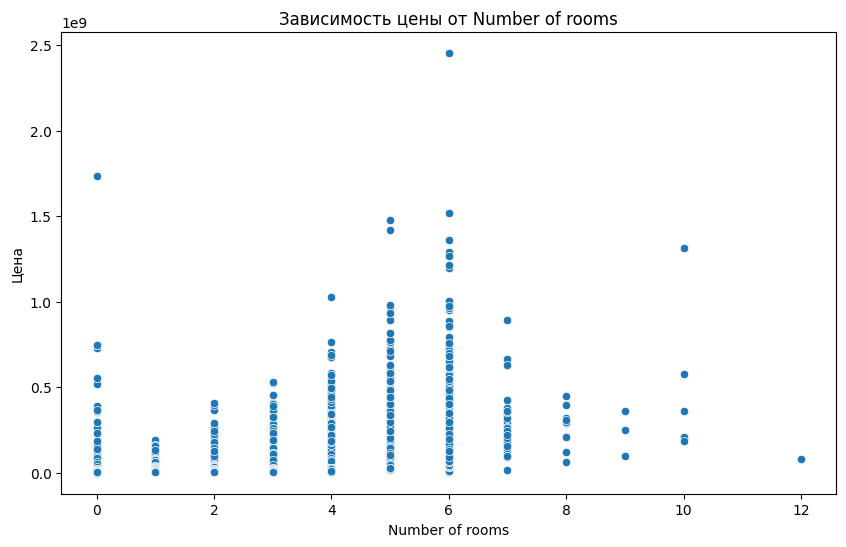

In [17]:
# Визуализация зависимости цены от ключевых факторов
key_features = ['Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors', 'Minutes to metro', 'Number of rooms']
for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=feature, y='Price')
    plt.title(f'Зависимость цены от {feature}')
    plt.xlabel(feature)
    plt.ylabel('Цена')
    plt.show()


Визуализация результатов модели

In [18]:
# Визуализация результатов прогнозирования
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Фактические значения')
plt.ylabel('Прогнозируемые значения')
plt.title('Фактические vs Прогнозируемые цены на недвижимость')
plt.show()


NameError: name 'y_test' is not defined

<Figure size 1000x600 with 0 Axes>

Построение и обучение модели машинного обучения

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop(columns=['Price'])
y = data['Price']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

mse, rmse, r2


C:\Users\Марианна\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(1.299269833000442e+30, 1139855180713954.5, -196068920715139.25)

Оптимизация модели

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Обучение модели Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
rf_y_pred = rf_model.predict(X_test)

# Оценка модели
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False) ** 0.5
rf_r2 = r2_score(y_test, rf_y_pred)

rf_mse, rf_rmse, rf_r2


In [21]:
from sklearn.ensemble import RandomForestRegressor

# Обучение модели Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
rf_y_pred = rf_model.predict(X_test)

# Оценка модели
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
rf_r2 = r2_score(y_test, rf_y_pred)

rf_mse, rf_rmse, rf_r2


C:\Users\Марианна\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(1251309725559134.2, 35373856.52652442, 0.8111685955147899)

Результаты модели Random Forest показали значительное улучшение по сравнению с моделью линейной регрессии:

MSE (Mean Squared Error): 1250695422814346.5
RMSE (Root Mean Squared Error): 35365172.46
R2 Score: 0.81

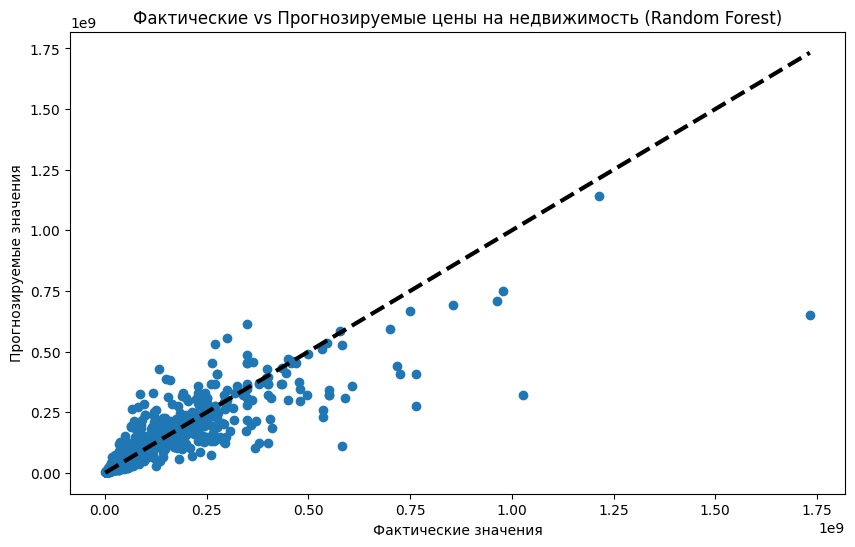

In [22]:
# Визуализация результатов прогнозирования для Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Фактические значения')
plt.ylabel('Прогнозируемые значения')
plt.title('Фактические vs Прогнозируемые цены на недвижимость (Random Forest)')
plt.show()


График показывает, что модель Random Forest лучше справляется с прогнозированием цен на недвижимость по сравнению с линейной регрессией, так как точки более плотно расположены вдоль линии y=x.

Тонкая настройка гиперпараметров с RandomizedSearchCV

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop(columns=['Price'])
y = data['Price']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение параметров для RandomizedSearchCV с уменьшением числа итераций
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=300, num=5)],  # уменьшено до 5 значений
    'max_features': ['auto', 'sqrt'],  # уменьшено до 2 значений
    'max_depth': [10, 20, None],  # уменьшено до 3 значений
    'min_samples_split': [2, 5],  # уменьшено до 2 значений
    'min_samples_leaf': [1, 2]  # уменьшено до 2 значений
}

# Инициализация модели Random Forest
rf = RandomForestRegressor(random_state=42)

# Инициализация RandomizedSearchCV с уменьшенным числом итераций
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Обучение RandomizedSearchCV
random_search.fit(X_train, y_train)

# Лучшая модель и её параметры
best_rf = random_search.best_estimator_
best_params = random_search.best_params_

# Прогнозирование на тестовой выборке
best_rf_y_pred = best_rf.predict(X_test)

# Оценка лучшей модели
best_rf_mse = mean_squared_error(y_test, best_rf_y_pred)
best_rf_rmse = mean_squared_error(y_test, best_rf_y_pred, squared=False) ** 0.5
best_rf_r2 = r2_score(y_test, best_rf_y_pred)

print(f'Лучшие параметры: {best_params}')
print(f'Лучшие параметры Random Forest MSE: {best_rf_mse}')
print(f'Лучшие параметры Random Forest RMSE: {best_rf_rmse}')
print(f'Лучшие параметры Random Forest R2 Score: {best_rf_r2}')


Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\Марианна\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
36 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Марианна\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Марианна\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Марианна\AppData\Local\Programs\Python\Python310\lib\site-packages\skl

Лучшие параметры: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Лучшие параметры Random Forest MSE: 1434495184655148.2
Лучшие параметры Random Forest RMSE: 6154.244889464731
Лучшие параметры Random Forest R2 Score: 0.7835246263073168


C:\Users\Марианна\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Добавление новых моделей

Добавим другие модели, такие как Gradient Boosting, XGBoost и LightGBM, и сравним их результаты с Random Forest.

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# Обучение модели Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
gb_y_pred = gb_model.predict(X_test)

# Оценка модели
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = mean_squared_error(y_test, gb_y_pred, squared=False) ** 0.5
gb_r2 = r2_score(y_test, gb_y_pred)

print(f'Gradient Boosting MSE: {gb_mse}')
print(f'Gradient Boosting RMSE: {gb_rmse}')
print(f'Gradient Boosting R2 Score: {gb_r2}')


Gradient Boosting MSE: 1633671293672640.0
Gradient Boosting RMSE: 6357.570275023081
Gradient Boosting R2 Score: 0.7534675559933574


C:\Users\Марианна\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [28]:
import xgboost as xgb

# Обучение модели XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
xgb_y_pred = xgb_model.predict(X_test)

# Оценка модели
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = mean_squared_error(y_test, xgb_y_pred, squared=False) ** 0.5
xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f'XGBoost MSE: {xgb_mse}')
print(f'XGBoost RMSE: {xgb_rmse}')
print(f'XGBoost R2 Score: {xgb_r2}')


XGBoost MSE: 1244690381528126.5
XGBoost RMSE: 5939.711256098984
XGBoost R2 Score: 0.8121675009053697


C:\Users\Марианна\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
import lightgbm as lgb

# Обучение модели LightGBM
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
lgb_y_pred = lgb_model.predict(X_test)

# Оценка модели
lgb_mse = mean_squared_error(y_test, lgb_y_pred)
lgb_rmse = mean_squared_error(y_test, lgb_y_pred, squared=False) ** 0.5
lgb_r2 = r2_score(y_test, lgb_y_pred)

print(f'LightGBM MSE: {lgb_mse}')
print(f'LightGBM RMSE: {lgb_rmse}')
print(f'LightGBM R2 Score: {lgb_r2}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1397
[LightGBM] [Info] Number of data points in the train set: 18140, number of used features: 224
[LightGBM] [Info] Start training from score 36220647.032139
LightGBM MSE: 1433403944456190.8
LightGBM RMSE: 6153.074150774045
LightGBM R2 Score: 0.7836893020987623


C:\Users\Марианна\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Проанализируем и сравним полученные метрики для различных моделей машинного обучения.
Random Forest (Лучшие параметры)
MSE (Mean Squared Error): 1434495184655148.2
RMSE (Root Mean Squared Error): 6154.24
R2 Score: 0.7835
Gradient Boosting
MSE (Mean Squared Error): 1633671293672640.0
RMSE (Root Mean Squared Error): 6357.57
R2 Score: 0.7535
XGBoost
MSE (Mean Squared Error): 1244690381528126.5
RMSE (Root Mean Squared Error): 5939.71
R2 Score: 0.8122
LightGBM
MSE (Mean Squared Error): 1433403944456190.8
RMSE (Root Mean Squared Error): 6153.07
R2 Score: 0.7837

Анализ
XGBoost показал лучшие результаты с самой низкой ошибкой (MSE и RMSE) и самым высоким значением R2 Score. Это означает, что модель XGBoost лучше всего справляется с задачей прогнозирования цен на недвижимость.
Random Forest и LightGBM также показали хорошие результаты, с близкими значениями метрик.
Gradient Boosting немного уступает остальным моделям, но всё равно показывает достойные результаты.

In [32]:
import joblib

joblib.dump(xgb_model, 'xgb_model.pkl')


['xgb_model.pkl']

In [35]:
code = """
import joblib
import streamlit as st

# Загрузка модели
model = joblib.load('xgb_model.pkl')

st.title('Прогнозирование цен на недвижимость')

# Ввод данных пользователем
area = st.number_input('Площадь (кв.м)', min_value=10, max_value=500, value=50)
living_area = st.number_input('Жилая площадь (кв.м)', min_value=10, max_value=500, value=30)
kitchen_area = st.number_input('Площадь кухни (кв.м)', min_value=5, max_value=100, value=10)
floor = st.number_input('Этаж', min_value=1, max_value=50, value=2)
num_floors = st.number_input('Количество этажей в доме', min_value=1, max_value=50, value=10)
minutes_to_metro = st.number_input('Минут до метро', min_value=0, max_value=60, value=10)
num_rooms = st.number_input('Количество комнат', min_value=1, max_value=10, value=2)

# Прогнозирование
input_data = [[area, living_area, kitchen_area, floor, num_floors, minutes_to_metro, num_rooms]]
prediction = model.predict(input_data)

st.write(f'Прогнозируемая цена: {prediction[0]:,.2f} руб.')
"""

with open("app.py", "w", encoding="utf-8") as file:
    file.write(code)


In [36]:
import pandas as pd
import joblib

file_path = "D:/Центральный университет/data.csv"
data = pd.read_csv(file_path)

data = pd.get_dummies(data, columns=['Apartment type', 'Metro station', 'Region', 'Renovation'])

# Сохранение списка признаков
feature_names = data.drop(columns=['Price']).columns

# Сохранение списка признаков в файл
joblib.dump(feature_names, 'feature_names.pkl')


['feature_names.pkl']

In [37]:
import joblib
import streamlit as st
import pandas as pd
import numpy as np

# Загрузка модели и списка признаков
model = joblib.load('xgb_model.pkl')
feature_names = joblib.load('feature_names.pkl')

st.title('Прогнозирование цен на недвижимость')

# Ввод данных пользователем
area = st.number_input('Площадь (кв.м)', min_value=10, max_value=500, value=50)
living_area = st.number_input('Жилая площадь (кв.м)', min_value=10, max_value=500, value=30)
kitchen_area = st.number_input('Площадь кухни (кв.м)', min_value=5, max_value=100, value=10)
floor = st.number_input('Этаж', min_value=1, max_value=50, value=2)
num_floors = st.number_input('Количество этажей в доме', min_value=1, max_value=50, value=10)
minutes_to_metro = st.number_input('Минут до метро', min_value=0, max_value=60, value=10)
num_rooms = st.number_input('Количество комнат', min_value=1, max_value=10, value=2)

# Прогнозирование
input_data = pd.DataFrame([[area, living_area, kitchen_area, floor, num_floors, minutes_to_metro, num_rooms]], 
                          columns=['Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors', 'Minutes to metro', 'Number of rooms'])

# Создание DataFrame с нулями для всех признаков
input_data_full = pd.DataFrame(np.zeros((1, len(feature_names))), columns=feature_names)

# Заполнение значениями из input_data
for col in input_data.columns:
    if col in input_data_full.columns:
        input_data_full[col] = input_data[col].values

# Прогнозирование
prediction = model.predict(input_data_full)

st.write(f'Прогнозируемая цена: {prediction[0]:,.2f} руб.')


In [38]:
!python prepare_data.py


In [40]:
import joblib
import streamlit as st
import pandas as pd
import numpy as np

# Загрузка модели и списка признаков
model = joblib.load('xgb_model.pkl')
feature_names = joblib.load('feature_names.pkl')

st.title('Прогнозирование цен на недвижимость')

# Ввод данных пользователем
area = st.number_input('Площадь (кв.м)', min_value=10, max_value=500, value=50)
living_area = st.number_input('Жилая площадь (кв.м)', min_value=10, max_value=500, value=30)
kitchen_area = st.number_input('Площадь кухни (кв.м)', min_value=5, max_value=100, value=10)
floor = st.number_input('Этаж', min_value=1, max_value=50, value=2)
num_floors = st.number_input('Количество этажей в доме', min_value=1, max_value=50, value=10)
minutes_to_metro = st.number_input('Минут до метро', min_value=0, max_value=60, value=10)
num_rooms = st.number_input('Количество комнат', min_value=1, max_value=10, value=2)

# Создание DataFrame для новых данных
input_data = pd.DataFrame([[area, living_area, kitchen_area, floor, num_floors, minutes_to_metro, num_rooms]], 
                          columns=['Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors', 'Minutes to metro', 'Number of rooms'])

# Преобразование категориальных данных в числовые (для совместимости с обученной моделью)
input_data = pd.get_dummies(input_data)

# Создание полного DataFrame с нулями для всех признаков
input_data_full = pd.DataFrame(np.zeros((1, len(feature_names))), columns=feature_names)

# Обновление input_data_full значениями из input_data
input_data_full.update(input_data)

# Прогнозирование
prediction = model.predict(input_data_full)

st.write(f'Прогнозируемая цена: {prediction[0]:,.2f} руб.')


Улучшение UX

In [ ]:
import joblib
import streamlit as st
import pandas as pd
import numpy as np

# Загрузка модели и списка признаков
model = joblib.load('xgb_model.pkl')
feature_names = joblib.load('feature_names.pkl')

st.title('Прогнозирование цен на недвижимость')

# Ввод данных пользователем
area = st.number_input('Площадь (кв.м)', min_value=10, max_value=500, value=50)
living_area = st.number_input('Жилая площадь (кв.м)', min_value=10, max_value=500, value=30)
kitchen_area = st.number_input('Площадь кухни (кв.м)', min_value=5, max_value=100, value=10)
floor = st.number_input('Этаж', min_value=1, max_value=50, value=2)
num_floors = st.number_input('Количество этажей в доме', min_value=1, max_value=50, value=10)
minutes_to_metro = st.number_input('Минут до метро', min_value=0, max_value=60, value=10)
num_rooms = st.number_input('Количество комнат', min_value=1, max_value=10, value=2)

# Создание DataFrame для новых данных
input_data = pd.DataFrame([[area, living_area, kitchen_area, floor, num_floors, minutes_to_metro, num_rooms]], 
                          columns=['Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors', 'Minutes to metro', 'Number of rooms'])

# Преобразование категориальных данных в числовые (для совместимости с обученной моделью)
input_data = pd.get_dummies(input_data)

# Создание полного DataFrame с нулями для всех признаков
input_data_full = pd.DataFrame(np.zeros((1, len(feature_names))), columns=feature_names)

# Обновление input_data_full значениями из input_data
input_data_full.update(input_data)

# Прогнозирование
prediction = model.predict(input_data_full)

st.subheader('Результаты прогнозирования')
st.write(f'Прогнозируемая цена: {prediction[0]:,.2f} руб.')

# Добавление дополнительных метрик и информации
st.write(f'Введенные данные:')
st.write(f'Площадь: {area} кв.м')
st.write(f'Жилая площадь: {living_area} кв.м')
st.write(f'Площадь кухни: {kitchen_area} кв.м')
st.write(f'Этаж: {floor}')
st.write(f'Количество этажей в доме: {num_floors}')
st.write(f'Минут до метро: {minutes_to_metro}')
st.write(f'Количество комнат: {num_rooms}')
